In [1]:
import requests
import tarfile

In [ ]:
URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url=URL, path=PATH):
  r = requests.get(url)
  with open(path, 'wb') as f:
    f.write(r.content)
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()
getData()

In [2]:
import pandas as pd

PATH = "housing.csv"

def loadData(path=PATH):
  return pd.read_csv(path)
data = loadData()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7198,-118.19,34.03,42.0,2250.0,629.0,2588.0,609.0,1.9719,134200.0,<1H OCEAN
9824,-121.91,36.62,40.0,1292.0,271.0,504.0,230.0,2.4750,258300.0,<1H OCEAN
12064,-117.58,33.87,34.0,1511.0,272.0,773.0,265.0,3.5313,142100.0,INLAND
19346,-122.83,38.58,17.0,5199.0,1023.0,2036.0,890.0,3.2452,168800.0,<1H OCEAN
13032,-121.19,38.66,26.0,1937.0,286.0,769.0,274.0,6.1185,179200.0,INLAND
2686,-115.53,32.97,35.0,1583.0,340.0,933.0,318.0,2.4063,70700.0,INLAND
4097,-118.41,34.15,46.0,1628.0,259.0,500.0,258.0,6.0830,424000.0,<1H OCEAN
7332,-118.18,33.97,30.0,2887.0,866.0,2806.0,830.0,2.2122,169400.0,<1H OCEAN
7526,-118.24,33.92,40.0,1772.0,369.0,1122.0,324.0,3.2768,96100.0,<1H OCEAN
1905,-119.96,38.84,17.0,2722.0,512.0,828.0,289.0,3.5714,109700.0,INLAND


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=22)

train.to_csv('housing_train.csv', index=False)
test.to_csv('housing_test.csv', index=False)

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

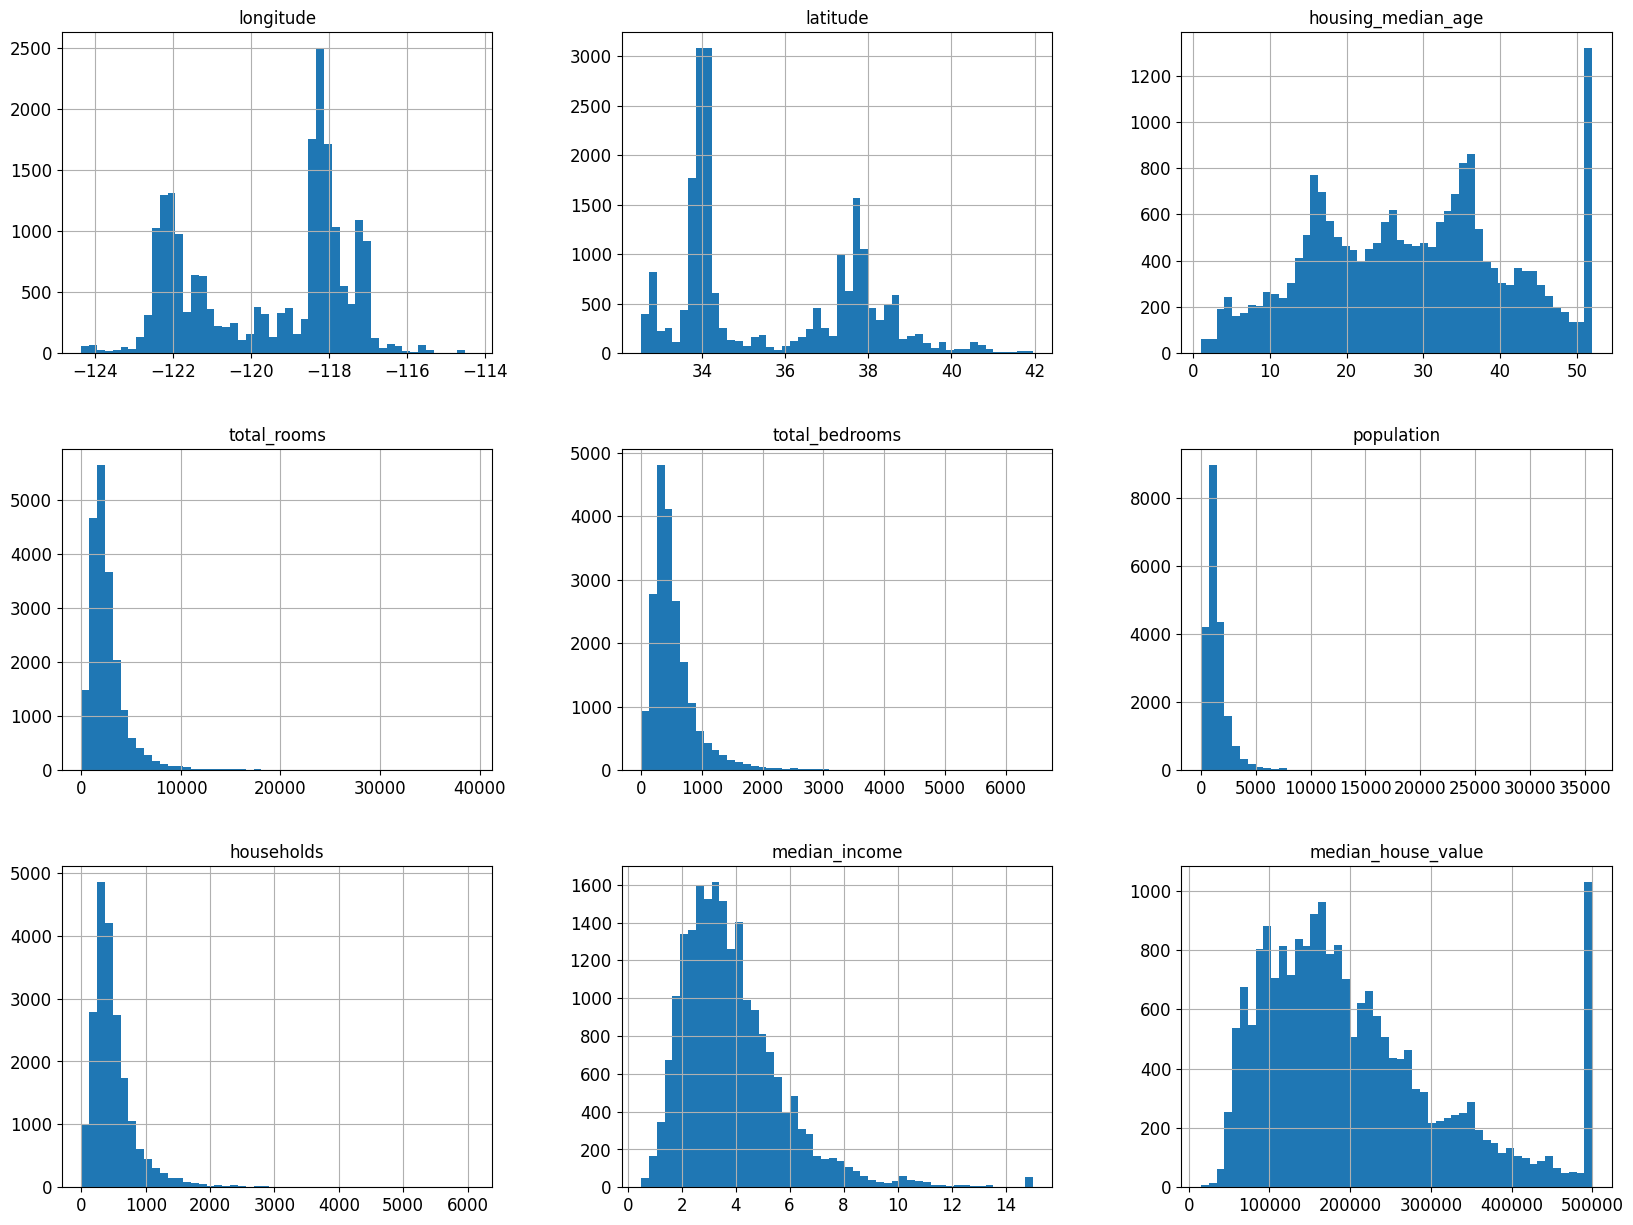

In [9]:
data.hist(bins=50, figsize=(20,15))
plt.show()

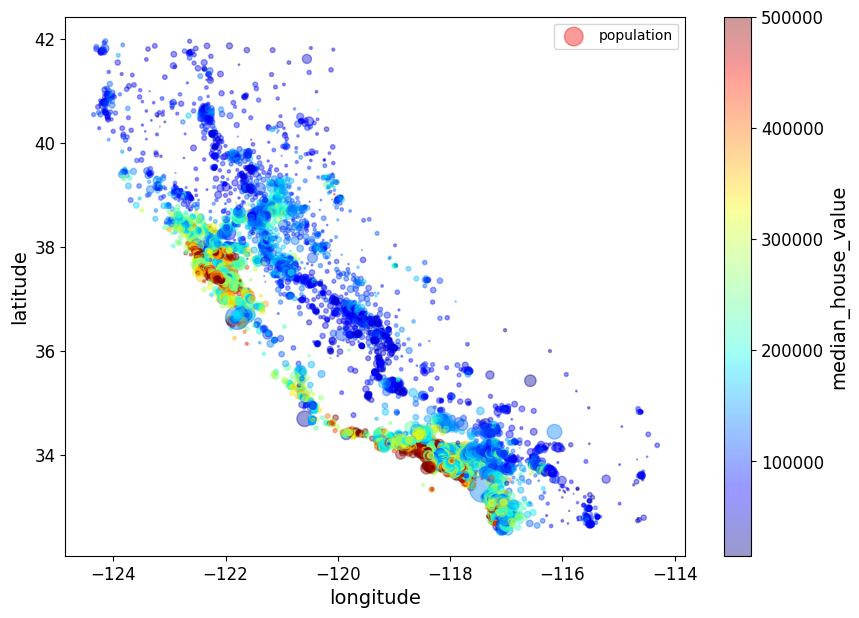

In [10]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

las casas mas caras se encuentran derce de la costa, y las mas baratas estan en el interior 

In [13]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


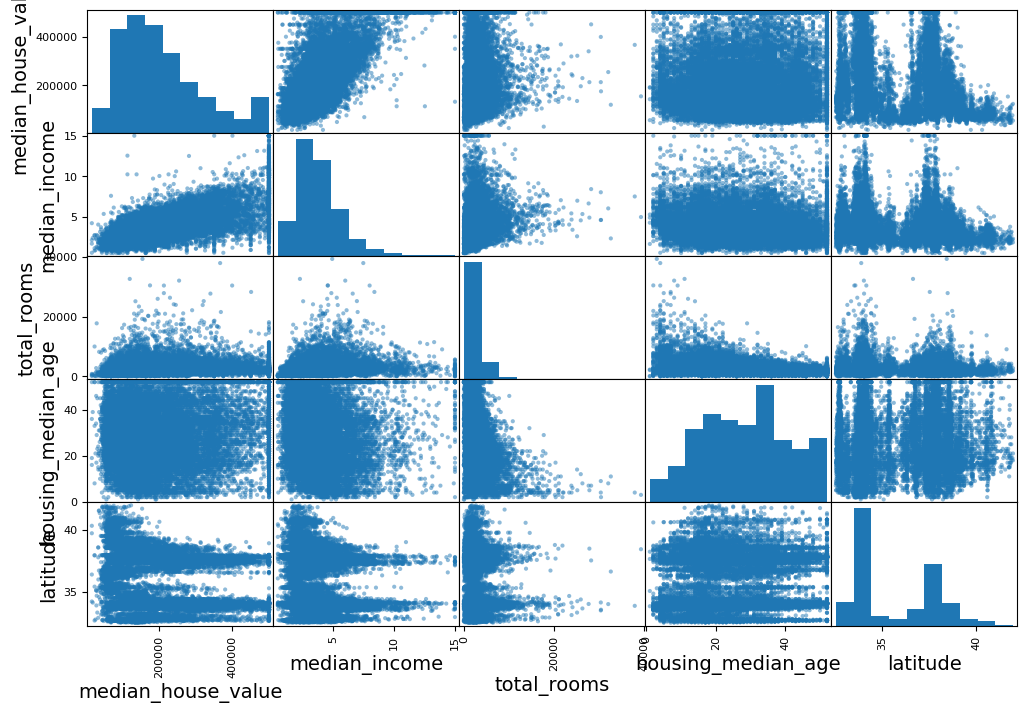

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age", "latitude"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

In [15]:
data = pd.read_csv('housing_train.csv')
data, labels = data.drop(['median_house_value'], axis=1), data['median_house_value'].copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,INLAND
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319,INLAND
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333,<1H OCEAN
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386,NEAR OCEAN
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333,INLAND


In [16]:
labels.head()

0     69000.0
1    138500.0
2    135400.0
3    216100.0
4     58200.0
Name: median_house_value, dtype: float64

In [17]:
data_num = data.drop(['ocean_proximity'], axis=1)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333


In [18]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
0,INLAND
1,INLAND
2,<1H OCEAN
3,NEAR OCEAN
4,INLAND


In [19]:
data_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2126.    ,  435.    , 1165.    ,
        410.    ,    3.5334])

In [21]:
X = imputer.transform(data_num)
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)
data_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

NameError: name 'OneHotEncoder' is not defined